In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl
from matplotlib.colors import LogNorm  # Import LogNorm for logarithmic scaling
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
d = pd.read_csv('../tables/d.csv', parse_dates=['Time_Start', 'Time_Stop', 'Time_Mid'])
d['tot'] = d[['Org_AMS_STP', 'SO4_AMS_STP', 'NO3_AMS_STP', 'NH4_AMS_STP', 'Chl_AMS_STP']].sum(axis=1)
d['OMF'] = d['Org_AMS_STP']/d['tot']
d['s'] = (d.Time_Mid - d.Time_Mid.dt.normalize()).dt.total_seconds()


In [3]:
def pick_day(d, date_str):
    return d[d.Time_Start.dt.date==pd.Timestamp(date_str).date()]

In [4]:
def t_s(d, ax, ref_num=4):


     # Create a colormap
    cmap = mpl.colormaps.get_cmap('rainbow_r')  # You can choose any colormap you like
    norm = LogNorm(vmin=d['Dp'].unique().min(), vmax=d['Dp'].unique().max())
    lab = ['Sea Salt', 'Ammonium Sulfate', 'Biogenic SOA', 'Sulfuric Acid']
    ris = [1.5484, 1.530, 1.44, 1.408]
    cs = ['blue', 'red', 'green', 'orange']
    samps = ref_num
    for j in range(samps):
        ax.text(x=(d.s.max()-d.s.min())*.02+d.s.min(), y=ris[j], s=lab[j], 
                va='top', ha='left')
        ax.axhline(ris[j], alpha=0.5, ls='--', color=cs[j])

    
    for dp in sorted(d['Dp'].unique()):
        dj = d[d.Dp==dp].copy()
        # Plot with seconds after midnight on the x-axis
        ax.scatter(dj.s, dj.RI, s=(dp/200)*2*15, color=cmap(norm(dp)), label = int(dp), alpha=0.7)

In [5]:
def t_s_resamp(d, ax, res):


     # Create a colormap
    cmap = mpl.colormaps.get_cmap('rainbow_r')  # You can choose any colormap you like
    norm = LogNorm(vmin=d['Dp'].unique().min(), vmax=d['Dp'].unique().max())
    lab = ['Sea Salt', 'Ammonium Sulfate']
    ris = [1.5484, 1.530]
    cs = ['blue', 'red']
    samps = 2
    for j in range(samps):
        ax.text(x=(d.s.max()-d.s.min())*.02+d.s.min(), y=ris[j], s=lab[j], 
                va='top', ha='left')
        ax.axhline(ris[j], alpha=0.5, ls='--', color=cs[j])

    
    for dp in sorted(d['Dp'].unique()):
        dj = d[d.Dp==dp].resample(res, on='Time_Mid').mean().copy()
        # Plot with seconds after midnight on the x-axis
        ax.scatter(dj.s, dj.RI, s=(dp/200)*2*15, color=cmap(norm(dp)), label = int(dp), alpha=0.7)

In [6]:
def t_s_resamp_line(d, ax, res):


     # Create a colormap
    cmap = mpl.colormaps.get_cmap('rainbow_r')  # You can choose any colormap you like
    norm = LogNorm(vmin=d['Dp'].unique().min(), vmax=d['Dp'].unique().max())
    lab = ['Sea Salt', 'Ammonium Sulfate']
    ris = [1.5484, 1.530]
    cs = ['blue', 'red']
    samps = 2
    for j in range(samps):
        ax.text(x=(d.s.max()-d.s.min())*.02+d.s.min(), y=ris[j], s=lab[j], 
                va='top', ha='left')
        ax.axhline(ris[j], alpha=0.5, ls='--', color=cs[j])

    
    for dp in sorted(d['Dp'].unique()):
        dj = d[d.Dp==dp].resample(res, on='Time_Mid').mean().copy()
        # Plot with seconds after midnight on the x-axis
        ax.plot(dj.s, dj.RI, color=cmap(norm(dp)), label = int(dp), alpha=0.7)

# Case 1 – cloud wall

In [7]:
d1 = pick_day(d, '2024-06-07')
d1 = d1[(d.s > 55100) & (d1.s < 61350)]

/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_99052/1756327242.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d1 = d1[(d.s > 55100) & (d1.s < 61350)]


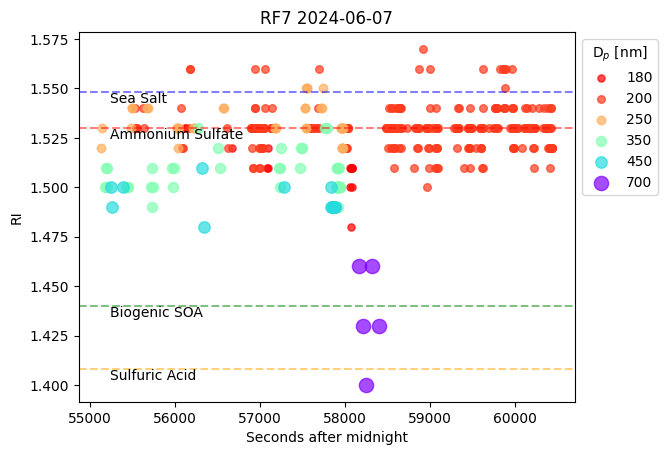

In [8]:
fig, ax = plt.subplots()
t_s(d1, ax)
ax.set_title('RF7 2024-06-07')
ax.legend(title='D$_p$ [nm]', bbox_to_anchor=(1, 1))
ax.set_xlabel('Seconds after midnight')
ax.set_ylabel('RI')
plt.savefig('../figures/1_ts.png', dpi=300, bbox_inches = 'tight')

"\nplt.xlabel('Category')\nplt.ylabel('RI')\nplt.title('Boxplots of RI for Different Categories')\nplt.xticks(rotation=30)\nplt.grid(axis='y', linestyle='--', alpha=0.7)\n"

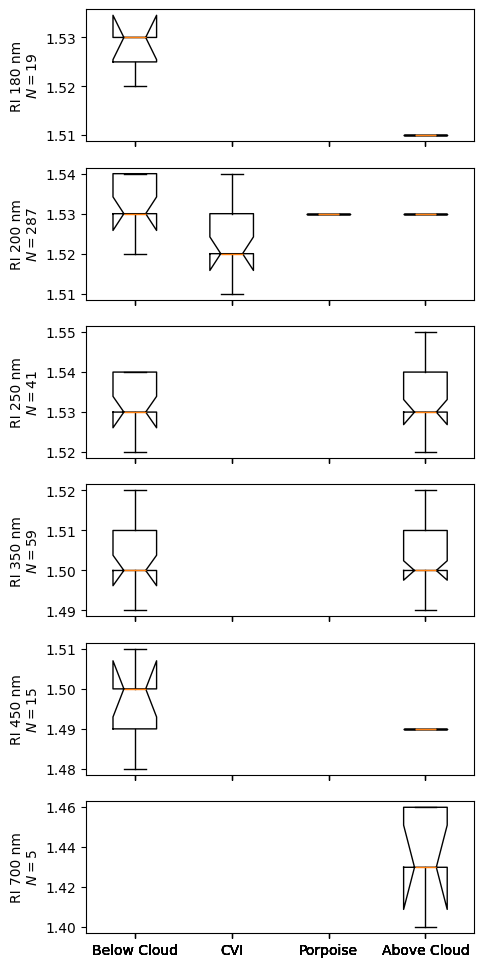

In [9]:
Dps = sorted(d1.Dp.unique())
fig,ax = plt.subplots(len(Dps), figsize=(5,2*len(Dps)), sharex=True)

for i in range(len(Dps)):
    di = d1[d1.Dp == Dps[i]].copy()

    # Define categories
    conditions = [
        (di['s'].between(55100, 56700)),
        (di['s'].between(60400, 61350)),
        (di['s'].between(58600, 60400)),
        (di['s'].between(56870, 58570))
        
    ]
    categories = ['Below Cloud', 'CVI', 'Porpoise', 'Above Cloud']


    # Assign category labels
    di['Category'] = None
    for j, condition in enumerate(conditions):
        di.loc[condition, 'Category'] = categories[j]

    # Prepare data for plotting
    data = [di.loc[di['Category'] == cat, 'RI'].dropna() for cat in categories]

    
    N = 0
    for j in range(4):
       N += len(data[j])

    ax[i].boxplot(data, tick_labels=categories, showfliers=False, notch=True)
    ax[i].set_ylabel('RI ' +  str(int(Dps[i])) + ' nm\n$N = $' + str(N))

fig.savefig('../figures/1_boxplots_all.png', dpi=300, bbox_inches='tight')
'''
plt.xlabel('Category')
plt.ylabel('RI')
plt.title('Boxplots of RI for Different Categories')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
'''

"\nplt.xlabel('Category')\nplt.ylabel('RI')\nplt.title('Boxplots of RI for Different Categories')\nplt.xticks(rotation=30)\nplt.grid(axis='y', linestyle='--', alpha=0.7)\n"

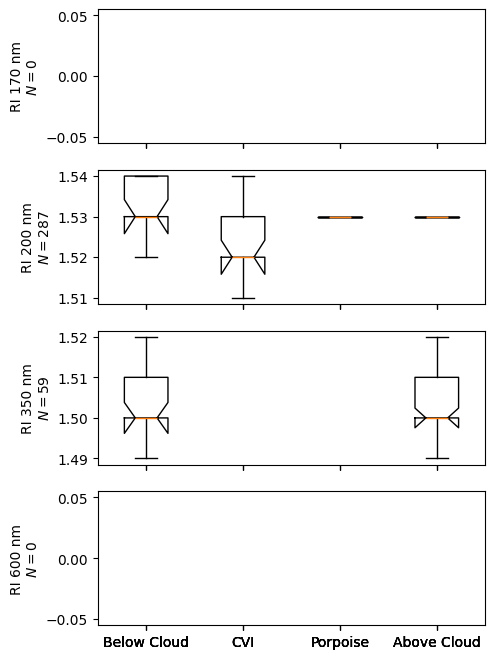

In [10]:
Dps = [170, 200, 350, 600]
fig,ax = plt.subplots(len(Dps), figsize=(5,2*len(Dps)), sharex=True)

for i in range(len(Dps)):
    di = d1[d1.Dp == Dps[i]].copy()

    # Define categories
    conditions = [
        (di['s'].between(55100, 56700)),
        (di['s'].between(60400, 61350)),
        (di['s'].between(58600, 60400)),
        (di['s'].between(56870, 58570))
        
    ]
    categories = ['Below Cloud', 'CVI', 'Porpoise', 'Above Cloud']


    # Assign category labels
    di['Category'] = None
    for j, condition in enumerate(conditions):
        di.loc[condition, 'Category'] = categories[j]

    # Prepare data for plotting
    data = [di.loc[di['Category'] == cat, 'RI'].dropna() for cat in categories]

    
    N = 0
    for j in range(4):
       N += len(data[j])

    ax[i].boxplot(data, tick_labels=categories, showfliers=False, notch=True)
    ax[i].set_ylabel('RI ' +  str(int(Dps[i])) + ' nm\n$N = $' + str(N))

fig.savefig('../figures/1_boxplots.png', dpi=300, bbox_inches='tight')
'''
plt.xlabel('Category')
plt.ylabel('RI')
plt.title('Boxplots of RI for Different Categories')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
'''

# Case 2 – Nares St

In [11]:
d2 = pick_day(d, '2024-05-28')
d2 = d2[(d2.s > 54000) & (d2.s < 65000)]

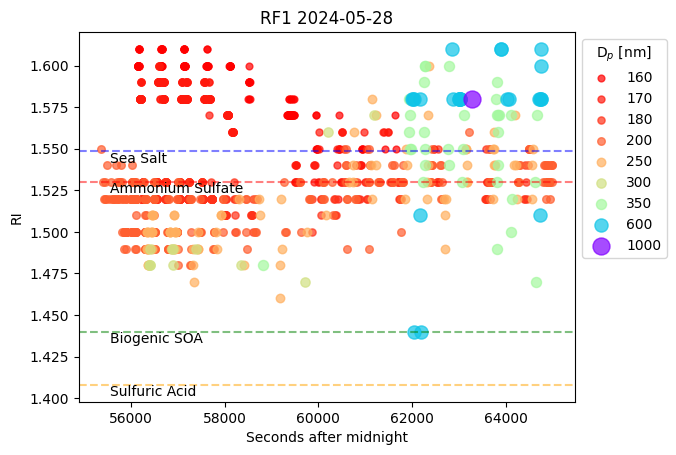

In [12]:
fig, ax = plt.subplots()
t_s(d2, ax)
ax.set_title('RF1 2024-05-28')
ax.legend(title='D$_p$ [nm]', bbox_to_anchor=(1, 1))
ax.set_xlabel('Seconds after midnight')
ax.set_ylabel('RI')
plt.savefig('../figures/2_ts.png', dpi=300, bbox_inches = 'tight')

"\nplt.xlabel('Category')\nplt.ylabel('RI')\nplt.title('Boxplots of RI for Different Categories')\nplt.xticks(rotation=30)\nplt.grid(axis='y', linestyle='--', alpha=0.7)\n"

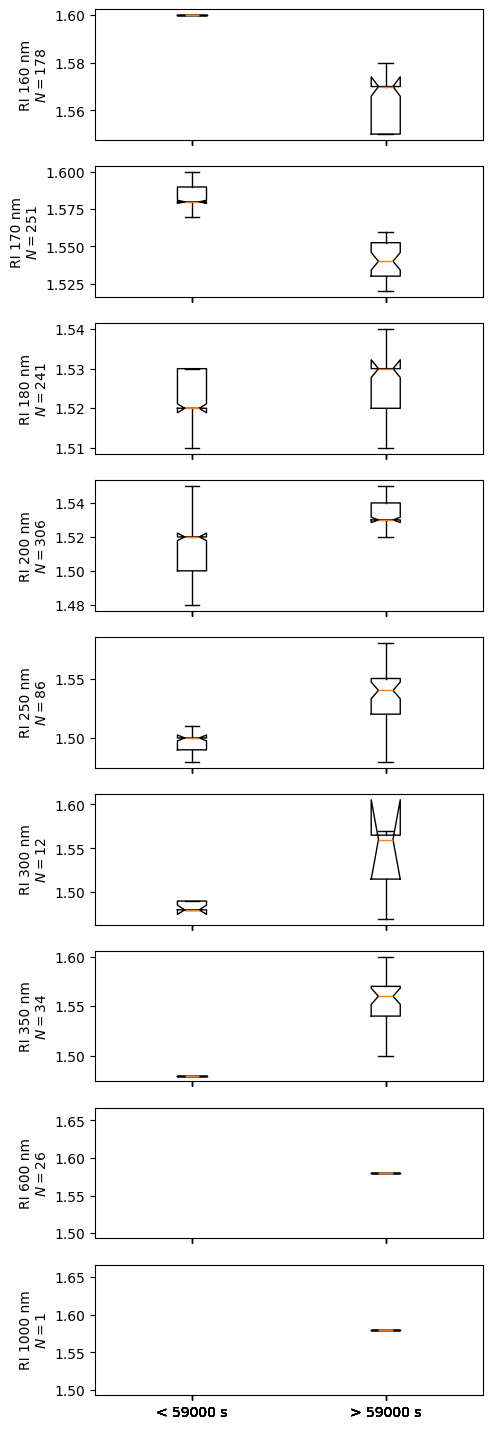

In [13]:
Dps = sorted(d2.Dp.unique())
fig,ax = plt.subplots(len(Dps), figsize=(5,2*len(Dps)), sharex=True)

for i in range(len(Dps)):
    di = d2[d2.Dp == Dps[i]].copy()

    # Define categories
    conditions = [
        (di['s'] < 59000),
        (di['s'] >= 59000)
        
    ]
    categories = ['< 59000 s', '> 59000 s']


    # Assign category labels
    di['Category'] = None
    for j, condition in enumerate(conditions):
        di.loc[condition, 'Category'] = categories[j]

    # Prepare data for plotting
    data = [di.loc[di['Category'] == cat, 'RI'].dropna() for cat in categories]

    
    N = 0
    for j in range(2):
       N += len(data[j])

    ax[i].boxplot(data, tick_labels=categories, showfliers=False, notch=True)
    ax[i].set_ylabel('RI ' +  str(int(Dps[i])) + ' nm\n$N = $' + str(N))

fig.savefig('../figures/2_boxplots_all.png', dpi=300, bbox_inches='tight')
'''
plt.xlabel('Category')
plt.ylabel('RI')
plt.title('Boxplots of RI for Different Categories')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
'''

"\nplt.xlabel('Category')\nplt.ylabel('RI')\nplt.title('Boxplots of RI for Different Categories')\nplt.xticks(rotation=30)\nplt.grid(axis='y', linestyle='--', alpha=0.7)\n"

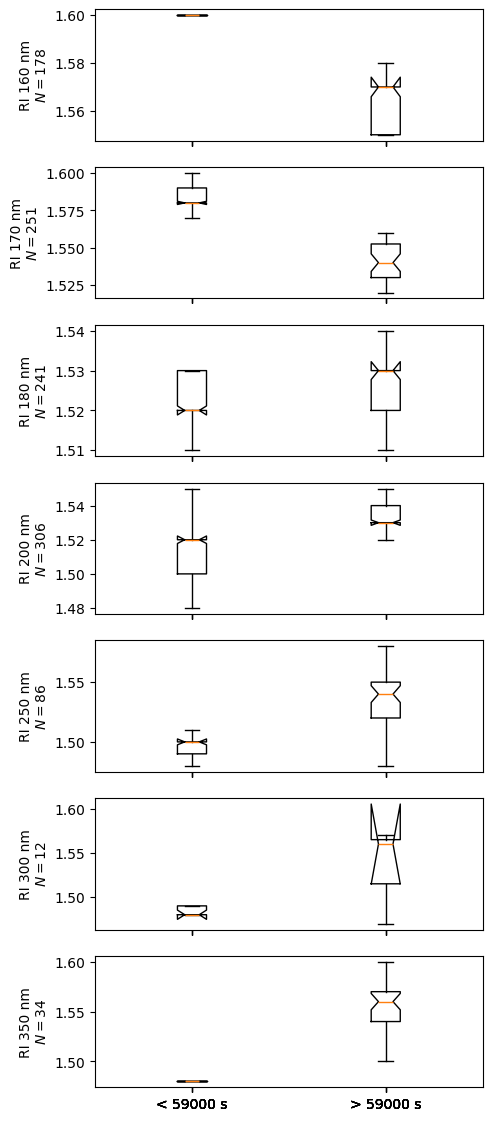

In [30]:
Dps = sorted(d2.Dp.unique())[:-2]
fig,ax = plt.subplots(len(Dps), figsize=(5,2*len(Dps)), sharex=True)

for i in range(len(Dps)):
    di = d2[d2.Dp == Dps[i]].copy()

    # Define categories
    conditions = [
        (di['s'] < 59000),
        (di['s'] >= 59000)
        
    ]
    categories = ['< 59000 s', '> 59000 s']


    # Assign category labels
    di['Category'] = None
    for j, condition in enumerate(conditions):
        di.loc[condition, 'Category'] = categories[j]

    # Prepare data for plotting
    data = [di.loc[di['Category'] == cat, 'RI'].dropna() for cat in categories]

    
    N = 0
    for j in range(2):
       N += len(data[j])

    ax[i].boxplot(data, tick_labels=categories, showfliers=False, notch=True)
    ax[i].set_ylabel('RI ' +  str(int(Dps[i])) + ' nm\n$N = $' + str(N))

fig.savefig('../figures/2_boxplots.png', dpi=300, bbox_inches='tight')
'''
plt.xlabel('Category')
plt.ylabel('RI')
plt.title('Boxplots of RI for Different Categories')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
'''

# Case 3 – Villum
Jun 13 – 46254 to 51907\
Aug 01 – 47197 to 51154

In [15]:
d3a = pick_day(d, '2024-06-13')
d3a = d3a[(d3a.s > 46254) & (d3a.s < 51907)]

d3b = pick_day(d, '2024-08-01')
d3b = d3b[(d3b.s > 47197) & (d3b.s < 51154)]
d3 = [d3a, d3b]

In [16]:
for i in range(0,2):
    if i == 0:
        Dps = sorted(d3[1].Dp.unique())
    for j in range(len(Dps)):
        print(Dps[j], len(d3[i][d3[i].Dp == Dps[j]]))
    print('')

180.0 0
200.0 950
250.0 0
350.0 38

180.0 11
200.0 7
250.0 5
350.0 81



In [17]:
d3[i][d3[i].Dp == Dps[j]].GPS_Altitude

24176    5798.090909
24177    5797.272727
24178    5797.951872
24184    5810.363636
24185    5816.300000
            ...     
24258     288.932551
24259     212.891148
24260     159.816116
24268     147.413636
24274     106.689579
Name: GPS_Altitude, Length: 81, dtype: float64

In [18]:
d3[0]['Dp'].unique()

array([200., 350.])

In [19]:
d3[1]['Dp'].unique()

array([350., 250., 200., 180.])

In [20]:
d3[1]

,Time_Start,Time_Stop,Time_Mid,RH,Dp,RI,GF,Org_AMS_STP,SO4_AMS_STP,NO3_AMS_STP,...,Mixing_Ratio,Part_Press_Water_Vapor,Sat_Vapor_Press_H2O,Sat_Vapor_Press_Ice,Relative_Humidity,UWindSpeed,VWindSpeed,tot,OMF,s
24176,2024-08-01 13:06:49,2024-08-01 13:06:57,2024-08-01 13:06:53.000,86.4,350.0,1.60,0.79,0.730143,0.135571,0.052286,...,0.445000,0.346250,1.366250,1.135000,25.420000,20.475000,19.962500,0.959571,0.760905,47213.0
24177,2024-08-01 13:06:57,2024-08-01 13:06:58,2024-08-01 13:06:57.500,86.4,350.0,1.65,NaN,NaN,NaN,NaN,...,0.450000,0.350000,1.380000,1.150000,25.650000,21.100000,20.000000,0.000000,NaN,47217.5
24178,2024-08-01 13:06:58,2024-08-01 13:07:15,2024-08-01 13:07:06.500,85.6,350.0,1.65,NaN,0.483143,0.214714,0.061571,...,0.501765,0.392941,1.382353,1.148235,28.355882,21.829412,20.152941,0.674000,0.716829,47226.5
24179,2024-08-01 13:07:43,2024-08-01 13:08:08,2024-08-01 13:07:55.500,85.7,250.0,1.69,0.83,0.889458,0.064125,-0.025792,...,0.728000,0.567600,1.401600,1.168400,40.492800,23.016000,20.384000,0.974250,0.912967,47275.5
24180,2024-08-01 13:08:32,2024-08-01 13:08:54,2024-08-01 13:08:43.000,84.4,200.0,1.59,0.84,1.320182,0.032818,0.032000,...,0.820455,0.639545,1.417727,1.180455,45.242273,24.327273,19.995455,1.413091,0.934251,47323.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24275,2024-08-01 14:03:17,2024-08-01 14:03:49,2024-08-01 14:03:33.000,74.7,250.0,1.62,1.21,0.129625,0.248958,0.026167,...,4.029687,6.479687,9.654375,10.275000,67.261875,-6.987500,-8.968750,0.497542,0.260531,50613.0
24276,2024-08-01 14:08:49,2024-08-01 14:09:02,2024-08-01 14:08:55.500,74.9,180.0,1.57,1.73,0.090200,0.221800,0.057200,...,3.390000,5.454615,10.257692,11.008462,53.192308,-5.800000,-6.046154,0.109800,0.821494,50935.5
24277,2024-08-01 14:09:02,2024-08-01 14:09:11,2024-08-01 14:09:06.500,75.0,180.0,1.53,1.67,-0.027500,0.187833,-0.066333,...,3.394444,5.465556,10.235556,10.984444,53.392222,-5.855556,-5.844444,-0.119833,0.229485,50946.5
24278,2024-08-01 14:09:11,2024-08-01 14:09:30,2024-08-01 14:09:20.500,74.8,180.0,1.54,1.67,0.183412,0.186294,0.052059,...,3.405263,5.478947,10.204211,10.943684,53.698947,-6.052632,-5.726316,0.395000,0.464334,50960.5


/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_99052/3718542041.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = di.groupby('altitude_bin').agg(
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_99052/3718542041.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = di.groupby('altitude_bin').agg(


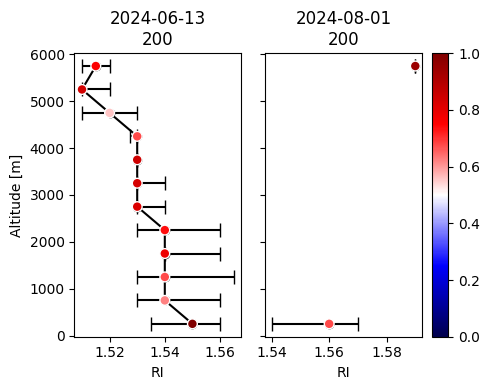

In [21]:
D = 200
fig,axes = plt.subplots(1,2, sharey=True, figsize=(5,4), width_ratios=[1, 1.1])
for i in range(2):
    di = d3[i][d3[i].Dp == D].copy()
    di['altitude_bin'] = pd.cut(di['GPS_Altitude'], bins=np.arange(0, di['GPS_Altitude'].max() + 500, 500))
    
    ax = axes[i]
    ax.set_title('2024-06-13\n'+ str(D) if i == 0 else '2024-08-01\n'+ str(D))

    grouped = di.groupby('altitude_bin').agg(
        count=('RI', 'count'),
        median_k_obs=('RI', 'median'),
        q25_k_obs=('RI', lambda x: np.nan if x.empty else np.quantile(x, 0.25)),
        q75_k_obs=('RI', lambda x: np.nan if x.empty else np.quantile(x, 0.75)),
        median_OMF=('OMF', 'mean')
    ).reset_index()
    # Extract the midpoint of each bin for plotting
    grouped['altitude_mid'] = grouped['altitude_bin'].apply(lambda x: x.mid)
    ax.errorbar(grouped['median_k_obs'], grouped['altitude_mid'], 
            xerr=[grouped['median_k_obs'] - grouped['q25_k_obs'], grouped['q75_k_obs'] - grouped['median_k_obs']], yerr=None, fmt='o', capsize=5, label='Median with 25-75% quantiles', ls='-', zorder=1, c='black')
    b = ax.scatter(grouped['median_k_obs'], grouped['altitude_mid'], c=grouped['median_OMF'], cmap='seismic', label='Median OMF', zorder=10, vmin = 0, vmax=1, linestyle='-', s=50, edgecolors='w')


    ax.set_xlabel('RI')
# Create a divider for the existing axes instance
divider = make_axes_locatable(axes[1])
cax = divider.append_axes("right", size="10%", pad=0.1)

# Create colorbar in the new axes
cbar = fig.colorbar(b, cax=cax)
axes[0].set_ylabel('Altitude [m]')
plt.tight_layout()
plt.savefig('../figures/3_alt_'+str(D)+'.png', dpi=300, bbox_inches = 'tight')

/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_99052/4128306824.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = di.groupby('altitude_bin').agg(
/Users/cassidysoloff/Documents/git/ARCSIX_DASH_RI/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:1719: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_99052/4128306824.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = di.groupby('altitude_bin

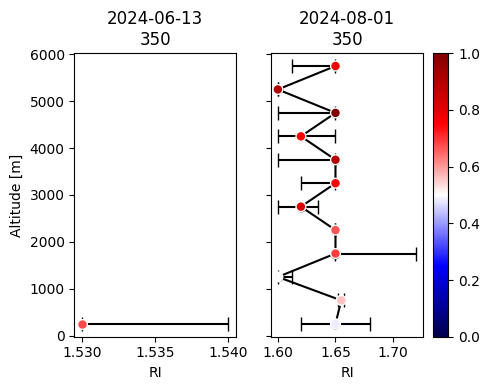

In [22]:
D = 350
fig,axes = plt.subplots(1,2, sharey=True, figsize=(5,4), width_ratios=[1, 1.1])
for i in range(2):
    di = d3[i][d3[i].Dp == D].copy()
    di['altitude_bin'] = pd.cut(di['GPS_Altitude'], bins=np.arange(0, di['GPS_Altitude'].max() + 500, 500))
    
    ax = axes[i]
    ax.set_title('2024-06-13\n'+ str(D) if i == 0 else '2024-08-01\n'+ str(D))

    grouped = di.groupby('altitude_bin').agg(
        count=('RI', 'count'),
        median_k_obs=('RI', 'median'),
        q25_k_obs=('RI', lambda x: np.nan if x.empty else np.quantile(x, 0.25)),
        q75_k_obs=('RI', lambda x: np.nan if x.empty else np.quantile(x, 0.75)),
        median_OMF=('OMF', 'mean')
    ).reset_index()
    # Extract the midpoint of each bin for plotting
    grouped['altitude_mid'] = grouped['altitude_bin'].apply(lambda x: x.mid)
    ax.errorbar(grouped['median_k_obs'], grouped['altitude_mid'], 
            xerr=[grouped['median_k_obs'] - grouped['q25_k_obs'], grouped['q75_k_obs'] - grouped['median_k_obs']], yerr=None, fmt='o', capsize=5, label='Median with 25-75% quantiles', ls='-', zorder=1, c='black')
    b = ax.scatter(grouped['median_k_obs'], grouped['altitude_mid'], c=grouped['median_OMF'], cmap='seismic', label='Median OMF', zorder=10, vmin = 0, vmax=1, linestyle='-', s=50, edgecolors='w')


    ax.set_xlabel('RI')
# Create a divider for the existing axes instance
divider = make_axes_locatable(axes[1])
cax = divider.append_axes("right", size="10%", pad=0.1)

# Create colorbar in the new axes
cbar = fig.colorbar(b, cax=cax)
axes[0].set_ylabel('Altitude [m]')
plt.tight_layout()
plt.savefig('../figures/3_alt_'+str(D)+'.png', dpi=300, bbox_inches = 'tight')

/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_99052/2143442832.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = di.groupby('altitude_bin').agg(
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_99052/2143442832.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = di.groupby('altitude_bin').agg(


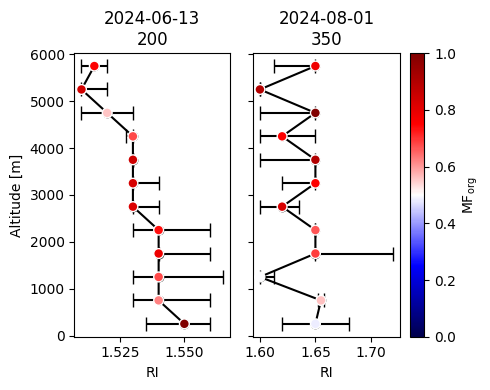

In [23]:
D = [200,350]
fig,axes = plt.subplots(1,2, sharey=True, figsize=(5,4), width_ratios=[1, 1.1])
for i in range(2):
    di = d3[i][d3[i].Dp == D[i]].copy()
    di['altitude_bin'] = pd.cut(di['GPS_Altitude'], bins=np.arange(0, di['GPS_Altitude'].max() + 500, 500))
    
    ax = axes[i]
    ax.set_title('2024-06-13\n'+ str(D[i]) if i == 0 else '2024-08-01\n'+ str(D[i]))

    grouped = di.groupby('altitude_bin').agg(
        count=('RI', 'count'),
        median_k_obs=('RI', 'median'),
        q25_k_obs=('RI', lambda x: np.nan if x.empty else np.quantile(x, 0.25)),
        q75_k_obs=('RI', lambda x: np.nan if x.empty else np.quantile(x, 0.75)),
        median_OMF=('OMF', 'mean')
    ).reset_index()
    # Extract the midpoint of each bin for plotting
    grouped['altitude_mid'] = grouped['altitude_bin'].apply(lambda x: x.mid)
    ax.errorbar(grouped['median_k_obs'], grouped['altitude_mid'], 
            xerr=[grouped['median_k_obs'] - grouped['q25_k_obs'], grouped['q75_k_obs'] - grouped['median_k_obs']], yerr=None, fmt='o', capsize=5, label='Median with 25-75% quantiles', ls='-', zorder=1, c='black')
    b = ax.scatter(grouped['median_k_obs'], grouped['altitude_mid'], c=grouped['median_OMF'], cmap='seismic', label='Median OMF', zorder=10, vmin = 0, vmax=1, linestyle='-', s=50, edgecolors='w')


    ax.set_xlabel('RI')
# Create a divider for the existing axes instance
divider = make_axes_locatable(axes[1])
cax = divider.append_axes("right", size="10%", pad=0.1)

# Create colorbar in the new axes
cbar = fig.colorbar(b, cax=cax)
cbar.set_label(r'MF$_{\rm org}$')
axes[0].set_ylabel('Altitude [m]')
plt.tight_layout()
plt.savefig('../figures/3_alt_comb.png', dpi=300, bbox_inches = 'tight')

/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_99052/2143442832.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = di.groupby('altitude_bin').agg(
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_99052/2143442832.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = di.groupby('altitude_bin').agg(


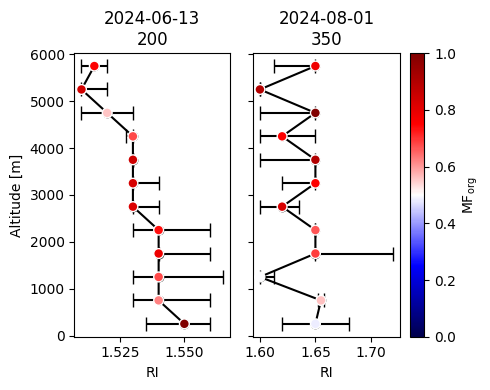

In [24]:
D = [200,350]
fig,axes = plt.subplots(1,2, sharey=True, figsize=(5,4), width_ratios=[1, 1.1])
for i in range(2):
    di = d3[i][d3[i].Dp == D[i]].copy()
    di['altitude_bin'] = pd.cut(di['GPS_Altitude'], bins=np.arange(0, di['GPS_Altitude'].max() + 500, 500))
    
    ax = axes[i]
    ax.set_title('2024-06-13\n'+ str(D[i]) if i == 0 else '2024-08-01\n'+ str(D[i]))

    grouped = di.groupby('altitude_bin').agg(
        count=('RI', 'count'),
        median_k_obs=('RI', 'median'),
        q25_k_obs=('RI', lambda x: np.nan if x.empty else np.quantile(x, 0.25)),
        q75_k_obs=('RI', lambda x: np.nan if x.empty else np.quantile(x, 0.75)),
        median_OMF=('OMF', 'mean')
    ).reset_index()
    # Extract the midpoint of each bin for plotting
    grouped['altitude_mid'] = grouped['altitude_bin'].apply(lambda x: x.mid)
    ax.errorbar(grouped['median_k_obs'], grouped['altitude_mid'], 
            xerr=[grouped['median_k_obs'] - grouped['q25_k_obs'], grouped['q75_k_obs'] - grouped['median_k_obs']], yerr=None, fmt='o', capsize=5, label='Median with 25-75% quantiles', ls='-', zorder=1, c='black')
    b = ax.scatter(grouped['median_k_obs'], grouped['altitude_mid'], c=grouped['median_OMF'], cmap='seismic', label='Median OMF', zorder=10, vmin = 0, vmax=1, linestyle='-', s=50, edgecolors='w')


    ax.set_xlabel('RI')
# Create a divider for the existing axes instance
divider = make_axes_locatable(axes[1])
cax = divider.append_axes("right", size="10%", pad=0.1)

# Create colorbar in the new axes
cbar = fig.colorbar(b, cax=cax)
cbar.set_label(r'MF$_{\rm org}$')
axes[0].set_ylabel('Altitude [m]')
plt.tight_layout()
plt.savefig('../figures/3_alt_comb.png', dpi=300, bbox_inches = 'tight')

/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_99052/2154827257.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = di.groupby('altitude_bin').agg(
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_99052/2154827257.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = di.groupby('altitude_bin').agg(


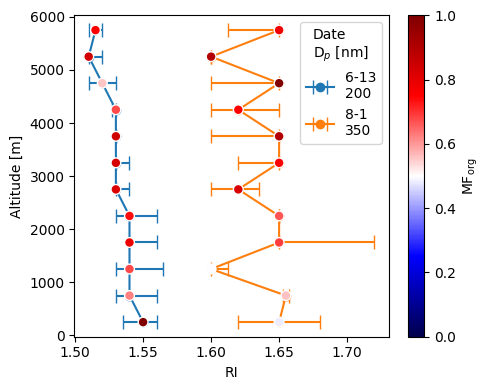

In [25]:
D = [200,350]
rf_label = ['6-13\n', '8-1\n']
fig,ax = plt.subplots(sharey=True, figsize=(5,4))
for i in range(2):
    di = d3[i][d3[i].Dp == D[i]].copy()
    di['altitude_bin'] = pd.cut(di['GPS_Altitude'], bins=np.arange(0, di['GPS_Altitude'].max() + 500, 500))
    
    #ax.set_title('2024-06-13\n'+ str(D[i]) if i == 0 else '2024-08-01\n'+ str(D[i]))

    grouped = di.groupby('altitude_bin').agg(
        count=('RI', 'count'),
        median_k_obs=('RI', 'median'),
        q25_k_obs=('RI', lambda x: np.nan if x.empty else np.quantile(x, 0.25)),
        q75_k_obs=('RI', lambda x: np.nan if x.empty else np.quantile(x, 0.75)),
        median_OMF=('OMF', 'mean')
    ).reset_index()
    # Extract the midpoint of each bin for plotting
    grouped['altitude_mid'] = grouped['altitude_bin'].apply(lambda x: x.mid)
    ax.errorbar(grouped['median_k_obs'], grouped['altitude_mid'], 
            xerr=[grouped['median_k_obs'] - grouped['q25_k_obs'], grouped['q75_k_obs'] - grouped['median_k_obs']], yerr=None, fmt='o', capsize=5, ls='-', zorder=1, label=rf_label[i]+str(D[i]))
    b = ax.scatter(grouped['median_k_obs'], grouped['altitude_mid'], c=grouped['median_OMF'], cmap='seismic', zorder=10, vmin = 0, vmax=1, linestyle='-', s=50, edgecolors='w')


    ax.set_xlabel('RI')
# Create a divider for the existing axes instance
#divider = make_axes_locatable(axes[1])
#cax = divider.append_axes("right", size="10%", pad=0.1)
ax.legend(title='Date\nD$_p$ [nm]')
# Create colorbar in the new axes
cbar = fig.colorbar(b)#, cax=cax)
cbar.set_label(r'MF$_{\rm org}$')
ax.set_ylabel('Altitude [m]')
plt.tight_layout()
plt.savefig('../figures/3_alt_comb2.png', dpi=300, bbox_inches = 'tight')

# Case 4 – Volcano

In [26]:
d4a = pick_day(d, '2024-06-03')

d4b = pick_day(d, '2024-06-05')

d4c = pick_day(d, '2024-06-06')

d4 = [d4a, d4b, d4c]

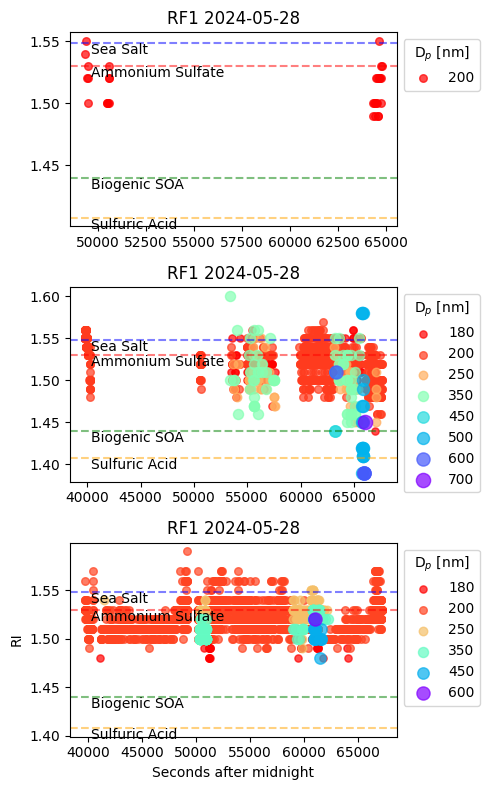

In [27]:
fig, axes = plt.subplots(3, figsize=(5, 8))
for i in range(3):
    ax = axes[i]
    t_s(d4[i], ax)
    ax.set_title('RF1 2024-05-28')
    ax.legend(title='D$_p$ [nm]', bbox_to_anchor=(1, 1))
ax.set_xlabel('Seconds after midnight')
ax.set_ylabel('RI')
plt.tight_layout()
#plt.savefig('../figures/2_ts.png', dpi=300, bbox_inches = 'tight')

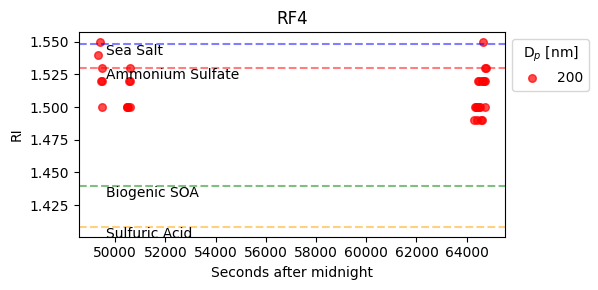

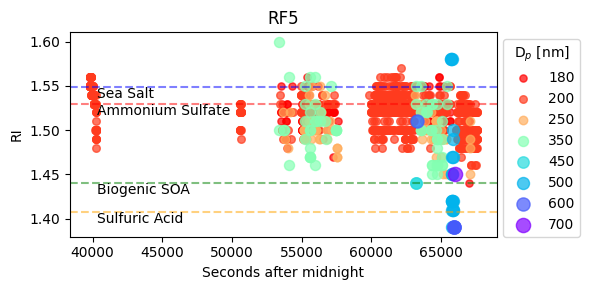

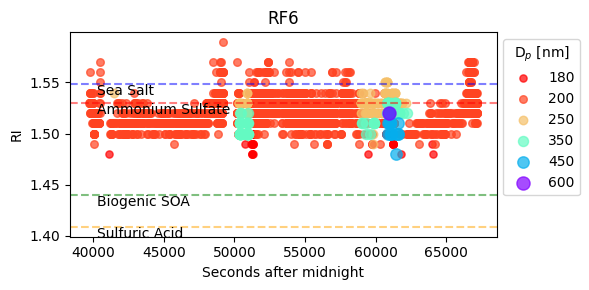

In [28]:
day = ['RF4', 'RF5', 'RF6']
for i in range(3):
    fig, ax = plt.subplots(figsize=(6, 3))
    '''
    if i !=1:
        t_s(d4[i], ax, ref_num=2)
    else:
    '''
    t_s(d4[i], ax)
    ax.set_title(day[i])
    ax.legend(title='D$_p$ [nm]', bbox_to_anchor=(1, 1))
    ax.set_xlabel('Seconds after midnight')
    ax.set_ylabel('RI')
    plt.tight_layout()
    plt.savefig('../figures/4_ts'+day[i]+'.png', dpi=300, bbox_inches = 'tight')